In [9]:
import glob
import cv2
import numpy as np


ModuleNotFoundError: No module named 'cv2'

In [10]:
WEIGHTS_FILE = "weight.h5"
IMAGE_SIZE=96
ALPHA = 0.35


In [11]:
from tensorflow.keras.applications import MobileNetV2


ModuleNotFoundError: No module named 'tensorflow'

In [12]:
def create_model(trainable=False):
    model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA)
    for layer in model.layers:
        layer.trainable = trainable

    out = model.layers[-1].output

    x = Conv2D(4, kernel_size=3)(out)
    x = Reshape((4,), name="coords")(x)

    y = GlobalAveragePooling2D()(out)
    y = Dense(2, name="classes", activation="softmax")(y)

    return Model(inputs=model.input, outputs=[x, y])

In [13]:
import csv
import math

from PIL import Image
import numpy as np
from \
import Model
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape,GlobalAveragePooling2D,Dense
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon

ModuleNotFoundError: No module named 'keras'

In [14]:

filename="./1.jpg"

In [15]:

unscaled = cv2.imread(filename)
image_height, image_width, _ = unscaled.shape

image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

region, class_id = model.predict(x=np.array([image]))
region = region[0]

x0 = int(region[0] * image_width / IMAGE_SIZE)
y0 = int(region[1]  * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

class_id = np.argmax(class_id, axis=1)

       

NameError: name 'cv2' is not defined

In [16]:
model = create_model()
model.load_weights(WEIGHTS_FILE)


NameError: name 'MobileNetV2' is not defined

In [17]:
cv2.rectangle(unscaled, (x0, y0), (x1, y1), (0, 0, 255), 1)
cv2.putText(unscaled, "class: {}".format(class_id[0]), (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
cv2.imshow("image", unscaled)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined

NameError: name 'unscaled' is not defined

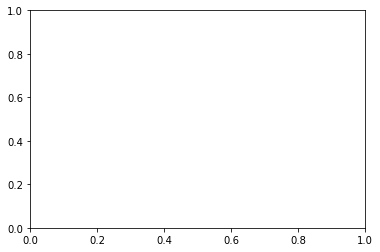

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig,ax = plt.subplots(1)
ax.imshow(unscaled)
rect = patches.Rectangle((x0, y0), x1, y1,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()